In [1]:
import torch
from PIL import Image
from definitions import ROOT_DIR
import os

image_path = os.path.join(ROOT_DIR, "laparoscopy_mucus.png")
device = "cuda" if torch.cuda.is_available() else "cpu"
raw_image = Image.open(image_path)

In [ ]:
from sam2.build_sam import build_sam2_video_predictor
from sam2.checkpoints import sam2.1

In [5]:
import torch

torch.cuda.is_available()

False

In [7]:
import torch
import os
from definitions import ROOT_DIR
from sam2.build_sam import build_sam2_video_predictor

checkpoint = os.path.join(ROOT_DIR, "external/sam2/checkpoints/sam2.1_hiera_large.pt")
model_cfg = os.path.join(ROOT_DIR, "external/sam2/sam2/configs/sam2.1/sam2.1_hiera_l.yaml")
video_path = os.path.join(ROOT_DIR, 'lapsnip.mp4')
predictor = build_sam2_video_predictor(model_cfg, checkpoint)

with torch.inference_mode(), torch.autocast("cuda", dtype=torch.bfloat16):
    state = predictor.init_state(video_path)

    # add new prompts and instantly get the output on the same frame
    frame_idx, object_ids, masks = predictor.add_new_points_or_box(
        inference_state=state, 
        frame_idx=frame_idx,
        obj_id=tracker_id,
        points=points,
        labels=labels,
    )

    # # propagate the prompts to get masklets throughout the video
    # for frame_idx, object_ids, masks in predictor.propagate_in_video(state):
        

AssertionError: Torch not compiled with CUDA enabled

In [2]:
import torch

torch.__version__

'2.9.0+cpu'

In [12]:
import torchvision

torchvision.__version__

AttributeError: partially initialized module 'torchvision' has no attribute 'extension' (most likely due to a circular import)

In [ ]:
C:\Users\zmirz\Projects\SAM2Laparoscopy\external\sam2\sam2\configs\sam2.1\sam2.1_hiera_l.yaml
C:\Users\zmirz\Projects\SAM2Laparoscopy\external\sam2\checkpoints\sam2.1_hiera_large.pt
from PIL import Image
import plotly.express as px
import plotly.graph_objects as go

frame1 = "frames/frame_0001.jpg"
frame = Image.open(frame1)
fig = px.imshow(frame)
fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0),  # remove padding
    paper_bgcolor='rgba(0,0,0,0)',     # transparent overall background
    plot_bgcolor='rgba(0,0,0,0)'       # transparent area behind the image
)

fig.add_trace(go.Scatter(
    x=[1156],
    y=[288],
    mode='markers',

    marker=dict(
        symbol="cross-thin",
        size=15,
        opacity=1,
        line=dict(color='red', width=2) 
    ),

    name='Selected Point'
))

fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)

fig.show()

In [121]:
from transformers import Sam2Processor, Sam2Model

model = Sam2Model.from_pretrained("facebook/sam2-hiera-large").to(device)
processor = Sam2Processor.from_pretrained("facebook/sam2-hiera-large")

You are using a model of type sam2_video to instantiate a model of type sam2. This is not supported for all configurations of models and can yield errors.


In [122]:
# Add both positive and negative points to refine the mask
input_points = [[[[300, 600]]]]  # Multiple points for refinement
input_labels = [[[1]]]  # Both positive clicks

inputs = processor(images=raw_image, input_points=input_points, input_labels=input_labels, return_tensors="pt").to(device)

with torch.no_grad():
    outputs = model(**inputs)

masks = processor.post_process_masks(outputs.pred_masks.cpu(), inputs["original_sizes"])[0]


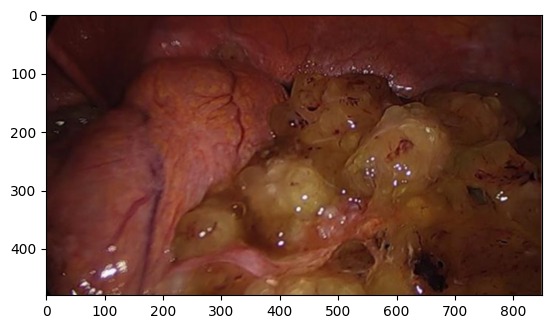

In [123]:
import matplotlib.pyplot as plt

plt.imshow(raw_image)
plt.show()

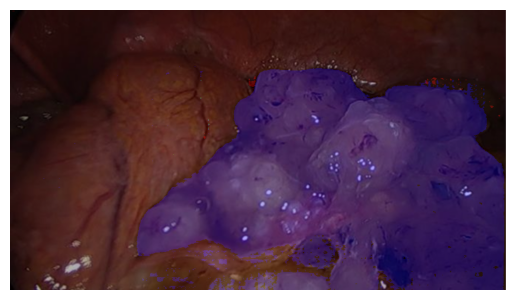

In [124]:
import matplotlib.pyplot as plt

mask = torch.transpose(masks[0], 0, -1)
mask = torch.transpose(mask, 0, 1).float()
plt.imshow(raw_image)
plt.imshow(mask, cmap='binary', alpha=0.3)
plt.axis('off')
plt.show()


In [89]:
mask.unique()

tensor([0., 1.])